In [5]:
import pandas as pd

# === Step 1: Define file path ===
# This is the result of a PSM search done in PEAKS Studio, exported as a CSV.
# It contains all matched peptides and associated metadata for a custom protein database.
psm_path = r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_psm_results\Peaks_exports2\YA_RZ_GW_SHMX_DB_analysis_AS_MAGs\DB search psm.csv"

# === Step 2: Load the CSV file as a DataFrame ===
# This will allow us to extract protein accessions and trace them back to taxonomy later.
df = pd.read_csv(psm_path)

# === Step 3: Preview the data structure ===
# This is important to confirm that expected columns such as 'Peptide', 'Accession', 'Found By' are present
display(df.head())

,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,Id,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By
0,LGEHNIDVLEGNEQFINAAK,122.75,2210.0967,20,2.3,1106.0581,2,119.72,754000.0,1,51390,41166,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
1,LGEHNIDVLEGNEQFINAAK,84.45,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,51404,41372,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
2,LGEHNIDVLEGNEQFINAAK,69.67,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,51403,41083,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB
3,GAHGDLMDEAAALQNYTVESADNSDIVVGR,116.35,3117.4309,30,0.0,1040.1509,3,143.89,2724900.0,1,63434,51408,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,hypothetical protein IPI17_15100 [Nitrosomona...,NaN,NaN,PEAKS DB
4,GAHGDLMDEAAALQNYTVESADNSDIVVGR,39.26,3117.4309,30,-5.4,1040.1453,3,140.06,0.0,1,84072,49855,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,hypothetical protein IPI17_15100 [Nitrosomona...,NaN,NaN,PEAKS DB


In [32]:
import pandas as pd
import re
from IPython.display import display

def extract_clean_taxon(text):
    """
    Extract only the organism name from within brackets.
    Takes the text after '[' and stops at ':' or ']' or ','.
    """
    if pd.isna(text):
        return "NA"
    
    if "[" in text:
        match = re.search(r"\[([^\[\]]+)", text)  # match everything after [
        if match:
            raw = match.group(1)
            # Split at ':' first, if present
            taxon = raw.split(":")[0]
            # Clean any trailing commas, DB flags, or whitespaces
            taxon = re.split(r",|\||\s+PEAKS|\s+DB", taxon)[0].strip()
            return taxon if taxon else "NA"
    return "NA"

df["Taxon_names"] = df["Accession"].apply(extract_clean_taxon)

total = len(df)
with_brackets = df["Accession"].astype(str).str.contains(r"\[").sum()
extracted = (df["Taxon_names"] != "NA").sum()

print(f"\nClean extraction complete.")
print(f"Entries with brackets: {with_brackets} / {total}")
print(f"Clean taxon names extracted: {extracted}")

pd.set_option("display.max_colwidth", None)
display(df[["Peptide", "Accession", "Taxon_names"]].head(50))



Clean extraction complete.
Entries with brackets: 1737 / 5276
Clean taxon names extracted: 1737


,Peptide,Accession,Taxon_names
0,LGEHNIDVLEGNEQFINAAK,NaN,NA
1,LGEHNIDVLEGNEQFINAAK,NaN,NA
2,LGEHNIDVLEGNEQFINAAK,NaN,NA
3,GAHGDLMDEAAALQNYTVESADNSDIVVGR,hypothetical protein IPI17_15100 [Nitrosomonas sp,Nitrosomonas sp
4,GAHGDLMDEAAALQNYTVESADNSDIVVGR,hypothetical protein IPI17_15100 [Nitrosomonas sp,Nitrosomonas sp
5,KVSYVLPAGSYAVGAGVYDDTPVATLESK,MBK7983733.1:MBK8961530.1:MBK9950756.1:MBK7541278.1:MBK8897725.1,NA
6,KVSYVLPAGSYAVGAGVYDDTPVATLESK,MBK7983733.1:MBK8961530.1:MBK9950756.1:MBK7541278.1:MBK8897725.1,NA
7,KVSYVLPAGSYAVGAGVYDDTPVATLESK,MBK7983733.1:MBK8961530.1:MBK9950756.1:MBK7541278.1:MBK8897725.1,NA
8,KVSYVLPAGSYAVGAGVYDDTPVATLESK,MBK7983733.1:MBK8961530.1:MBK9950756.1:MBK7541278.1:MBK8897725.1,NA
9,KVSYVLPAGSYAVGAGVYDDTPVATLESK,MBK7983733.1:MBK8961530.1:MBK9950756.1:MBK7541278.1:MBK8897725.1,NA


In [33]:
import pandas as pd
import re

def wrangle_peptides(sequence: str, ptm_filter: bool=True, li_swap: bool=True) -> str:
    if ptm_filter:
        sequence = "".join(re.findall(r"[A-Z]+", sequence))
    if li_swap:
        sequence = sequence.replace("L", "I")
    return sequence

# Only filter rows with NA in Taxon_names
filtered_df = df[df["Taxon_names"] == "NA"].copy()

# Clean peptides
filtered_df["Cleaned_Sequence"] = filtered_df["Peptide"].apply(wrangle_peptides)

print(f"🧼 Cleaned peptides shape: {filtered_df.shape}")
display(filtered_df[["Peptide", "Cleaned_Sequence"]][25:35])


🧼 Cleaned peptides shape: (3539, 20)


,Peptide,Cleaned_Sequence
39,AGVAFSLIGVN(+.98)GSGTDQTQTELAHER,AGVAFSIIGVNGSGTDQTQTEIAHER
40,AGVAFSLIGVN(+.98)GSGTDQTQTELAHER,AGVAFSIIGVNGSGTDQTQTEIAHER
41,AGVAFSLIGVN(+.98)GSGTDQTQTELAHER,AGVAFSIIGVNGSGTDQTQTEIAHER
42,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
43,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
44,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
45,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
46,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
47,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR
48,GAN(+.98)GGWVEYQWTKPGAEGNHR,GANGGWVEYQWTKPGAEGNHR


In [34]:
import requests
from tqdm import tqdm
import time

# === Settings ===
batch_size = 100
output_taxa = []
output_ranks = []
indices = []

lca_count = 0
taxa_count = 0

# Rank specificity hierarchy
rank_order = [
    "strain", "species", "subspecies", "genus", "subgenus", "family",
    "order", "class", "phylum", "kingdom", "superkingdom"
]

# === Main Loop ===
for start in range(0, len(filtered_df), batch_size):
    batch = filtered_df.iloc[start:start+batch_size]
    print(f"\n🔄 Processing batch {start}–{start+len(batch)-1}...")

    for i, row in tqdm(batch.iterrows(), total=len(batch)):
        pep = row["Cleaned_Sequence"]
        index = row.name

        taxon_name = "NA"
        taxon_rank = "NA"

        # === Try pept2lca first ===
        lca_url = f"https://api.unipept.ugent.be/api/v2/pept2lca.json?input[]={pep}"
        try:
            r1 = requests.get(lca_url, timeout=10)
            r1.raise_for_status()
            result = r1.json()
            if result:
                entry = result[0]
                if entry["taxon_name"].lower() not in ["na", "root"]:
                    taxon_name = entry["taxon_name"]
                    taxon_rank = entry.get("taxon_rank", "NA")
                    lca_count += 1
        except Exception as e:
            print(f"⚠️ pept2lca failed for {pep}: {e}")

        # === Fallback to pept2taxa ===
        if taxon_name == "NA":
            taxa_url = f"https://api.unipept.ugent.be/api/v2/pept2taxa.json?input[]={pep}"
            try:
                r2 = requests.get(taxa_url, timeout=10)
                r2.raise_for_status()
                result = r2.json()

                ranked = [
                    (hit["taxon_name"], hit["taxon_rank"])
                    for hit in result
                    if hit.get("taxon_name", "").lower() not in ["na", "root"]
                    and hit.get("taxon_rank") in rank_order
                ]

                if ranked:
                    ranked.sort(key=lambda x: rank_order.index(x[1]))
                    taxon_name, taxon_rank = ranked[0]
                    taxa_count += 1
            except Exception as e:
                print(f"❌ pept2taxa also failed for {pep}: {e}")

        output_taxa.append(taxon_name)
        output_ranks.append(taxon_rank)
        indices.append(index)

        time.sleep(0.1)

# === Apply to DataFrame ===
df.loc[indices, "Taxon_names"] = output_taxa
df.loc[indices, "Taxon_rank"] = output_ranks

# === Save results ===
output_path = "metaproteomics_updated_taxa.csv"
df.to_csv(output_path, index=False)

# === Summary ===
print("\n✅ UniPept querying complete.")
print(f"🧬 Taxon names from pept2lca: {lca_count}")
print(f"🔁 Taxon names from pept2taxa (fallback): {taxa_count}")
print(f"💾 Updated DataFrame saved to: {output_path}")
print(f"📊 Total valid taxon names now: {df['Taxon_names'].ne('NA').sum()} / {len(df)}")

# Optional preview
display(df[df.index.isin(indices)][["Peptide", "Taxon_names", "Taxon_rank"]].head(10))



🔄 Processing batch 0–99...


100%|██████████| 100/100 [00:26<00:00,  3.84it/s]



🔄 Processing batch 100–199...


100%|██████████| 100/100 [00:24<00:00,  4.07it/s]



🔄 Processing batch 200–299...


100%|██████████| 100/100 [00:25<00:00,  3.99it/s]



🔄 Processing batch 300–399...


100%|██████████| 100/100 [00:25<00:00,  3.92it/s]



🔄 Processing batch 400–499...


100%|██████████| 100/100 [00:35<00:00,  2.80it/s]



🔄 Processing batch 500–599...


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]



🔄 Processing batch 600–699...


100%|██████████| 100/100 [00:25<00:00,  3.88it/s]



🔄 Processing batch 700–799...


100%|██████████| 100/100 [00:25<00:00,  3.85it/s]



🔄 Processing batch 800–899...


100%|██████████| 100/100 [00:25<00:00,  3.91it/s]



🔄 Processing batch 900–999...


100%|██████████| 100/100 [00:33<00:00,  3.00it/s]



🔄 Processing batch 1000–1099...


100%|██████████| 100/100 [00:27<00:00,  3.62it/s]



🔄 Processing batch 1100–1199...


100%|██████████| 100/100 [00:24<00:00,  4.05it/s]



🔄 Processing batch 1200–1299...


100%|██████████| 100/100 [00:26<00:00,  3.80it/s]



🔄 Processing batch 1300–1399...


100%|██████████| 100/100 [00:25<00:00,  3.94it/s]



🔄 Processing batch 1400–1499...


100%|██████████| 100/100 [00:26<00:00,  3.83it/s]



🔄 Processing batch 1500–1599...


100%|██████████| 100/100 [00:34<00:00,  2.87it/s]



🔄 Processing batch 1600–1699...


100%|██████████| 100/100 [00:26<00:00,  3.71it/s]



🔄 Processing batch 1700–1799...


100%|██████████| 100/100 [00:35<00:00,  2.78it/s]



🔄 Processing batch 1800–1899...


100%|██████████| 100/100 [00:26<00:00,  3.80it/s]



🔄 Processing batch 1900–1999...


100%|██████████| 100/100 [00:33<00:00,  2.99it/s]



🔄 Processing batch 2000–2099...


100%|██████████| 100/100 [00:25<00:00,  3.93it/s]



🔄 Processing batch 2100–2199...


100%|██████████| 100/100 [00:26<00:00,  3.80it/s]



🔄 Processing batch 2200–2299...


100%|██████████| 100/100 [00:35<00:00,  2.82it/s]



🔄 Processing batch 2300–2399...


100%|██████████| 100/100 [00:24<00:00,  4.16it/s]



🔄 Processing batch 2400–2499...


100%|██████████| 100/100 [00:34<00:00,  2.88it/s]



🔄 Processing batch 2500–2599...


100%|██████████| 100/100 [00:25<00:00,  3.88it/s]



🔄 Processing batch 2600–2699...


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]



🔄 Processing batch 2700–2799...


100%|██████████| 100/100 [00:33<00:00,  2.96it/s]



🔄 Processing batch 2800–2899...


100%|██████████| 100/100 [00:25<00:00,  3.91it/s]



🔄 Processing batch 2900–2999...


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]



🔄 Processing batch 3000–3099...


100%|██████████| 100/100 [00:27<00:00,  3.70it/s]



🔄 Processing batch 3100–3199...


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]



🔄 Processing batch 3200–3299...


100%|██████████| 100/100 [00:35<00:00,  2.79it/s]



🔄 Processing batch 3300–3399...


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]



🔄 Processing batch 3400–3499...


100%|██████████| 100/100 [00:35<00:00,  2.78it/s]



🔄 Processing batch 3500–3538...


100%|██████████| 39/39 [00:10<00:00,  3.66it/s]


✅ UniPept querying complete.
🧬 Taxon names from pept2lca: 1175
🔁 Taxon names from pept2taxa (fallback): 1570
💾 Updated DataFrame saved to: metaproteomics_updated_taxa.csv
📊 Total valid taxon names now: 4482 / 5276


,Peptide,Taxon_names,Taxon_rank
0,LGEHNIDVLEGNEQFINAAK,Sus scrofa,species
1,LGEHNIDVLEGNEQFINAAK,Sus scrofa,species
2,LGEHNIDVLEGNEQFINAAK,Sus scrofa,species
5,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
6,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
7,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
8,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
9,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
10,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species
11,KVSYVLPAGSYAVGAGVYDDTPVATLESK,Candidatus Competibacteraceae bacterium,species


In [39]:
# Count rows with multiple taxon names (separated by ';')
multiple_taxa = df["Taxon_names"].astype(str).str.contains(";").sum()

# Total rows with taxon names (non-NA)
non_na = df["Taxon_names"].ne("NA").sum()

print(f"🔎 Rows with multiple organism names: {multiple_taxa}")
print(f"📊 Out of total valid taxon name rows: {non_na}")


🔎 Rows with multiple organism names: 0
📊 Out of total valid taxon name rows: 4482


In [4]:
import pandas as pd
from tqdm import tqdm
from Bio import Entrez
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

# === Settings ===
Entrez.email = "your_email@example.com"  # Replace with your email
max_concurrent_requests = 1             # You can change this value

# === Load DataFrame ===
df = pd.read_csv("metaproteomics_updated_taxa.csv")

# === Step 1: Identify taxa with missing rank but valid names ===
mask_missing_rank = df["Taxon_rank"].isna() & df["Taxon_names"].notna()
taxa_with_missing_rank = df.loc[mask_missing_rank, "Taxon_names"]
unique_taxa = taxa_with_missing_rank.dropna().unique()

print(f"🔍 Unique taxa to fetch ranks for: {len(unique_taxa)}")

# === Step 2: Avoid querying duplicates ===
existing_ranks = df[~df["Taxon_rank"].isna()].dropna(subset=["Taxon_names"])[["Taxon_names", "Taxon_rank"]]
taxon_to_rank = dict(zip(existing_ranks["Taxon_names"], existing_ranks["Taxon_rank"]))

# === Step 3: Function to fetch from NCBI with retry ===
def fetch_ncbi_rank(taxon_name, retries=3, delay=2):
    if taxon_name in taxon_to_rank:
        return taxon_name, taxon_to_rank[taxon_name]  # Already known

    for attempt in range(retries):
        try:
            search = Entrez.esearch(db="taxonomy", term=taxon_name + "[Scientific Name]")
            record = Entrez.read(search)
            if record["IdList"]:
                tax_id = record["IdList"][0]
                fetch = Entrez.efetch(db="taxonomy", id=tax_id, retmode="xml")
                data = Entrez.read(fetch)
                return taxon_name, data[0]["Rank"]
            break
        except Exception as e:
            wait = delay * (2 ** attempt)
            print(f"⚠️ Retry {attempt+1} for '{taxon_name}' failed ({e}), waiting {wait}s...")
            time.sleep(wait)
    return taxon_name, None

# === Step 4: Concurrent querying ===
with ThreadPoolExecutor(max_workers=max_concurrent_requests) as executor:
    futures = {executor.submit(fetch_ncbi_rank, name): name for name in unique_taxa if name not in taxon_to_rank}

    for future in tqdm(as_completed(futures), total=len(futures), desc="🚀 Fetching taxon ranks"):
        try:
            name, rank = future.result()
            if rank:
                taxon_to_rank[name] = rank
        except Exception as e:
            print(f"❌ Final failure for '{futures[future]}': {e}")

# === Step 5: Map all known taxon ranks back to DataFrame ===
df["Taxon_rank"] = df["Taxon_names"].map(taxon_to_rank)

# === Step 6: Save result ===
df.to_csv("metaproteomics_updated_taxa.csv", index=False)
print("✅ All taxon_rank values updated and saved to 'metaproteomics_updated_taxa.csv'.")


🔍 Unique taxa to fetch ranks for: 4


🚀 Fetching taxon ranks: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

✅ All taxon_rank values updated and saved to 'metaproteomics_updated_taxa.csv'.


In [12]:
import pandas as pd

# === Load your updated file ===
df = pd.read_csv("metaproteomics_updated_taxa.csv")

# === Step 1: Get unique taxon names with missing rank ===
missing_ranks_df = df[df["Taxon_rank"].isna() & df["Taxon_names"].notna()]
unique_missing_taxa = sorted(missing_ranks_df["Taxon_names"].unique())

# === Step 2: Print the list so you can copy/paste it into a mapping ===
print("\n📋 Unique taxon names with missing rank:\n")
print(unique_missing_taxa)


📋 Unique taxon names with missing rank:

['Candidatus Promineofilum sp', 'Fe', 'Tetrasphaera sp']


In [13]:
# === Step 3: Create a manual mapping (YOU fill in the correct ranks) ===
manual_rank_map = {
    "Candidatus Promineofilum sp": "species",
    "Tetrasphaera sp": "genus",
    # "Nitrosomonas sp": "species",
}

# === Step 4: Apply your mapping ===
for taxon, rank in manual_rank_map.items():
    matched = df["Taxon_names"] == taxon
    df.loc[matched & df["Taxon_rank"].isna(), "Taxon_rank"] = rank

# === Step 5: Save and confirm ===
df.to_csv("metaproteomics_updated_taxa.csv", index=False)
print("\nSaved updated ranks to metaproteomics_updated_taxa.csv")

# === Step 6: Final stats ===
valid_taxon_names = df["Taxon_names"].ne("NA")
valid_ranks = df.loc[valid_taxon_names, "Taxon_rank"].notna().sum()
print(f"Valid ranks for taxon names: {valid_ranks} / {valid_taxon_names.sum()}")


Saved updated ranks to metaproteomics_updated_taxa.csv
Valid ranks for taxon names: 4476 / 5276


In [11]:
import pandas as pd

# Load the updated CSV
df = pd.read_csv("metaproteomics_updated_taxa.csv")

# Count non-NA taxon ranks
valid_ranks = df["Taxon_rank"].notna().sum()
total_rows = len(df)

print(f"📊 Rows with valid taxon ranks: {valid_ranks} / {total_rows}")


📊 Rows with valid taxon ranks: 4465 / 5276


C:\Temp\ipykernel_5108\1234097050.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1234097050.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1234097050.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1234097050.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")


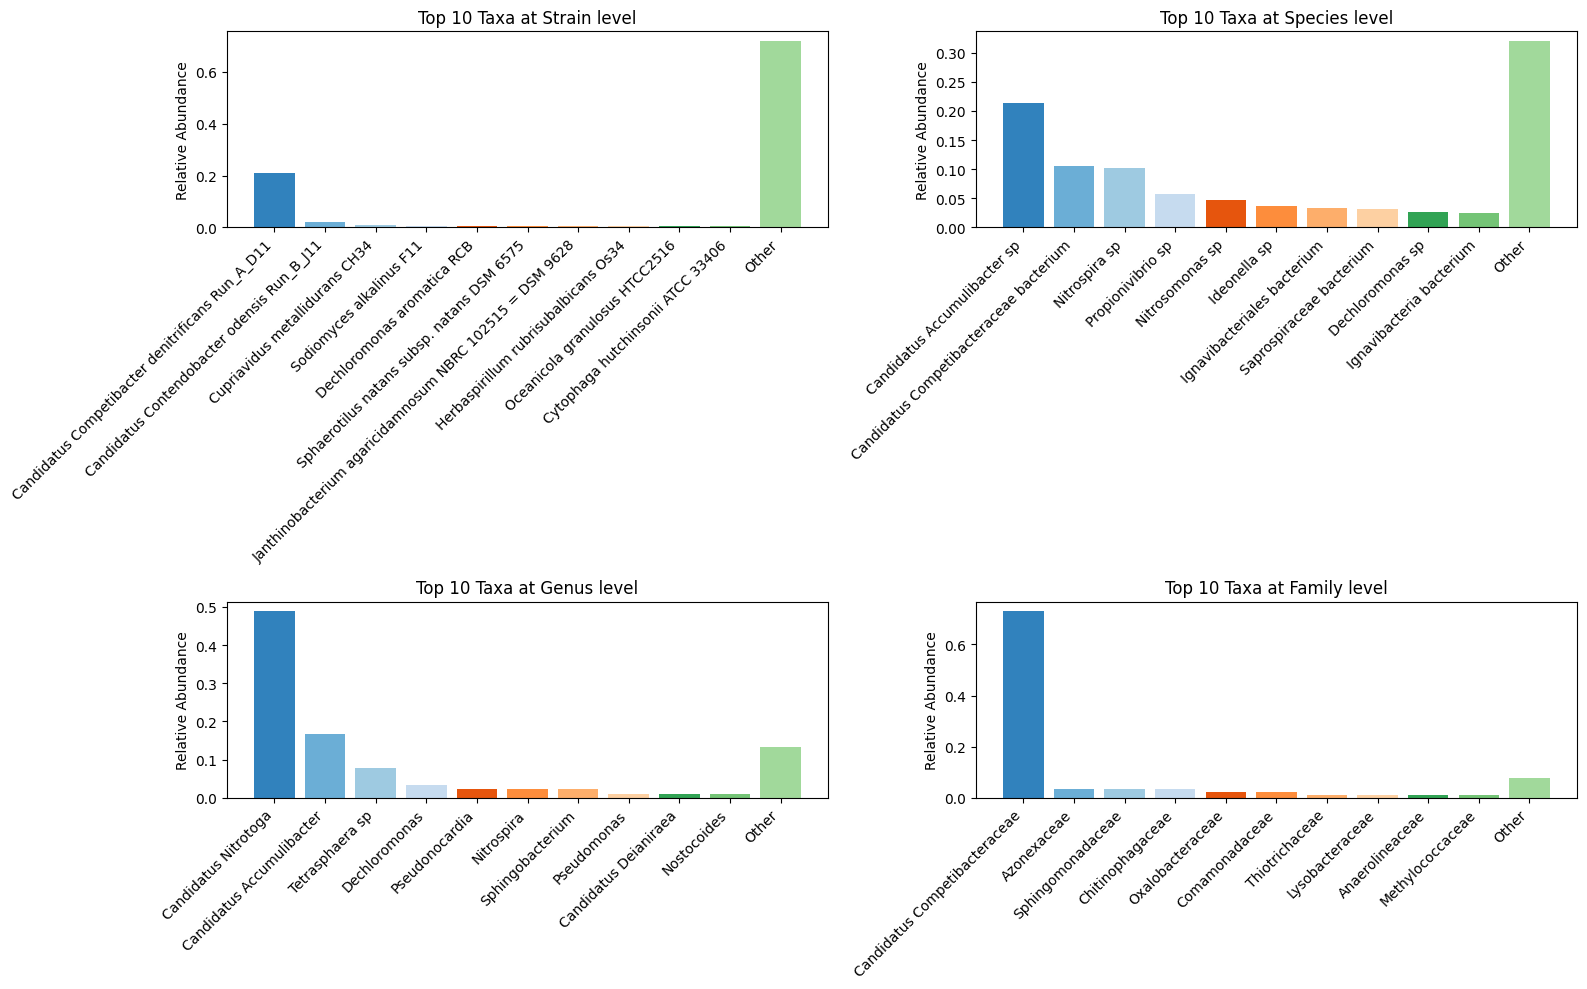

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Define ranks to plot ===
ranks_to_plot = ["strain", "species", "genus", "family"]

# === Step 2: Prepare figure ===
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# === Step 3: Loop through each rank ===
for i, rank in enumerate(ranks_to_plot):
    ax = axes[i]

    # Filter DataFrame for the current rank
    df_rank = df[df["Taxon_rank"] == rank]

    # Count frequency of taxon names at this rank
    taxon_counts = df_rank["Taxon_names"].value_counts()

    # Select top 10 taxa
    top_10 = taxon_counts.head(10)
    other = taxon_counts.iloc[10:].sum()

    # Create a new Series with "Other" added
    full_counts = pd.concat([top_10, pd.Series({"Other": other})])

    # Normalize to relative abundance
    relative_abundance = full_counts / full_counts.sum()

   # Define color map
    colors = plt.cm.tab20c.colors

    # Plot as bar with valid color values
    ax.bar(relative_abundance.index, relative_abundance.values, color=colors[:len(relative_abundance)])
    ax.set_title(f"Top 10 Taxa at {rank.capitalize()} level")
    ax.set_ylabel("Relative Abundance")
    ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")

# === Step 4: Layout and show ===
plt.tight_layout()
plt.show()


Now that we derived the community composition for the AS_MAGs metagenomics database, we do so for the SP_MG metagenomics database using unipept pept2lca.

In [19]:
import pandas as pd
import re
from pathlib import Path

# === Function to clean peptide sequences ===
def wrangle_peptides(sequence: str, ptm_filter: bool = True, li_swap: bool = True) -> str:
    """
    Clean peptide sequences by removing PTMs and standardizing L/I residues.

    Args:
        sequence (str): Raw peptide sequence.
        ptm_filter (bool): Remove PTM characters if True.
        li_swap (bool): Convert all L to I if True.

    Returns:
        str: Cleaned peptide sequence.
    """
    if ptm_filter:
        sequence = "".join(re.findall(r"[A-Z]+", sequence))
    if li_swap:
        sequence = sequence.replace("L", "I")
    return sequence

# === Load the data ===
file_path = Path(r"C:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\db_psm_results\Peaks_exports2\YA_RZ_GW_SHMX_DB_analysis_SP_MG\DB search psm.csv")
df = pd.read_csv(file_path)

# === Ensure the column with peptides is correctly named ===
# Try to find the peptide column automatically
possible_cols = [col for col in df.columns if "peptide" in col.lower() or "sequence" in col.lower()]
if not possible_cols:
    raise ValueError("Could not find a peptide sequence column.")
peptide_col = possible_cols[0]

# === Clean the peptides ===
df["Cleaned Sequence"] = df[peptide_col].apply(lambda x: wrangle_peptides(str(x)))


print(f"Shape of DataFrame: {df.shape}")
print("Sample cleaned peptides:")
print(df[[peptide_col, "Cleaned Sequence"]].iloc[58:63])


Shape of DataFrame: (7902, 19)
Sample cleaned peptides:
                             Peptide            Cleaned Sequence
58  AGVAFSLIGVN(+.98)GSGTDQTQTELAHER  AGVAFSIIGVNGSGTDQTQTEIAHER
59  AGVAFSLIGVN(+.98)GSGTDQTQTELAHER  AGVAFSIIGVNGSGTDQTQTEIAHER
60                    HEILGSYIYSDGNR              HEIIGSYIYSDGNR
61                    HEILGSYIYSDGNR              HEIIGSYIYSDGNR
62                    HEILGSYIYSDGNR              HEIIGSYIYSDGNR


In [ ]:
import pandas as pd
import requests
import time
from tqdm import tqdm

# === Function to query UniPept API with retries ===
def query_unipept_lca(peptides: list, retries: int = 3, delay: int = 5) -> list:
    url = "http://api.unipept.ugent.be/api/v1/pept2lca.json?equate_il=true"
    params = [("input[]", pep) for pep in peptides]
    for attempt in range(retries):
        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                return response.json()
        except Exception as e:
            print(f"Request error: {e}")
        print(f"Retry {attempt + 1}/{retries} in {delay} sec...")
        time.sleep(delay)
    raise RuntimeError(f"Failed to fetch UniPept data after {retries} attempts")

# === Drop all columns after "Cleaned Sequence" ===
if "Cleaned Sequence" in df.columns:
    keep_cols = df.columns[:df.columns.get_loc("Cleaned Sequence") + 1]
    df = df.loc[:, keep_cols]
else:
    raise ValueError("❌ 'Cleaned Sequence' column not found in DataFrame")

# === Get unique cleaned peptides ===
cleaned_peptides = df["Cleaned Sequence"].dropna().drop_duplicates().tolist()

# === Query UniPept in batches ===
batch_size = 100
results = []

print("🔄 Querying UniPept pept2lca in batches...")
for i in tqdm(range(0, len(cleaned_peptides), batch_size)):
    batch = cleaned_peptides[i:i + batch_size]
    response = query_unipept_lca(batch)
    for entry in response:
        results.append({
            "Cleaned Sequence": entry.get("peptide", "Unknown"),
            "lca name": entry.get("taxon_name", "Unknown"),
            "lca rank": entry.get("taxon_rank", "Unknown")
        })

# === Merge clean LCA annotations ===
lca_df = pd.DataFrame(results)
df = df.merge(lca_df, on="Cleaned Sequence", how="left")

# === Save to CSV ===
output_path = "SP_MG_metagenpsm_withlcas.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Annotated DataFrame saved to: {output_path}")

# === Preview ===
print("\n📋 Preview of annotated DataFrame:")
display(df[["Peptide", "Cleaned Sequence", "lca name", "lca rank"]].head(10))

# === Summary ===
total_psms = df.shape[0]
taxa_assigned = df["lca name"].notna().sum() - df["lca name"].isin(["Unknown"]).sum()
ranks_assigned = df["lca rank"].notna().sum() - df["lca rank"].isin(["Unknown"]).sum()

print("\n📊 Annotation Summary:")
print(f"Total PSMs: {total_psms}")
print(f"✅ PSMs with assigned lca name: {taxa_assigned} ({taxa_assigned / total_psms:.2%})")
print(f"✅ PSMs with assigned lca rank: {ranks_assigned} ({ranks_assigned / total_psms:.2%})")


🔄 Querying UniPept pept2lca in batches...


100%|██████████| 52/52 [00:04<00:00, 10.52it/s]


✅ Annotated DataFrame saved to: DB_search_cleaned_lca_results.csv

📋 Preview of annotated DataFrame:


,Peptide,Cleaned Sequence,lca name,lca rank
0,LGEHNIDVLEGNEQFINAAK,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
1,LGEHNIDVLEGNEQFINAAK,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
2,LGEHNIDVLEGNEQFINAAK,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
3,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
4,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
5,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
6,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
7,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
8,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
9,TDPTGVLNESYIVDHAYIR,TDPTGVINESYIVDHAYIR,NaN,NaN



📊 Annotation Summary:
Total PSMs: 7902
✅ PSMs with assigned lca name: 6031 (76.32%)
✅ PSMs with assigned lca rank: 6031 (76.32%)


C:\Temp\ipykernel_5108\1185219358.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1185219358.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1185219358.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")
C:\Temp\ipykernel_5108\1185219358.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")


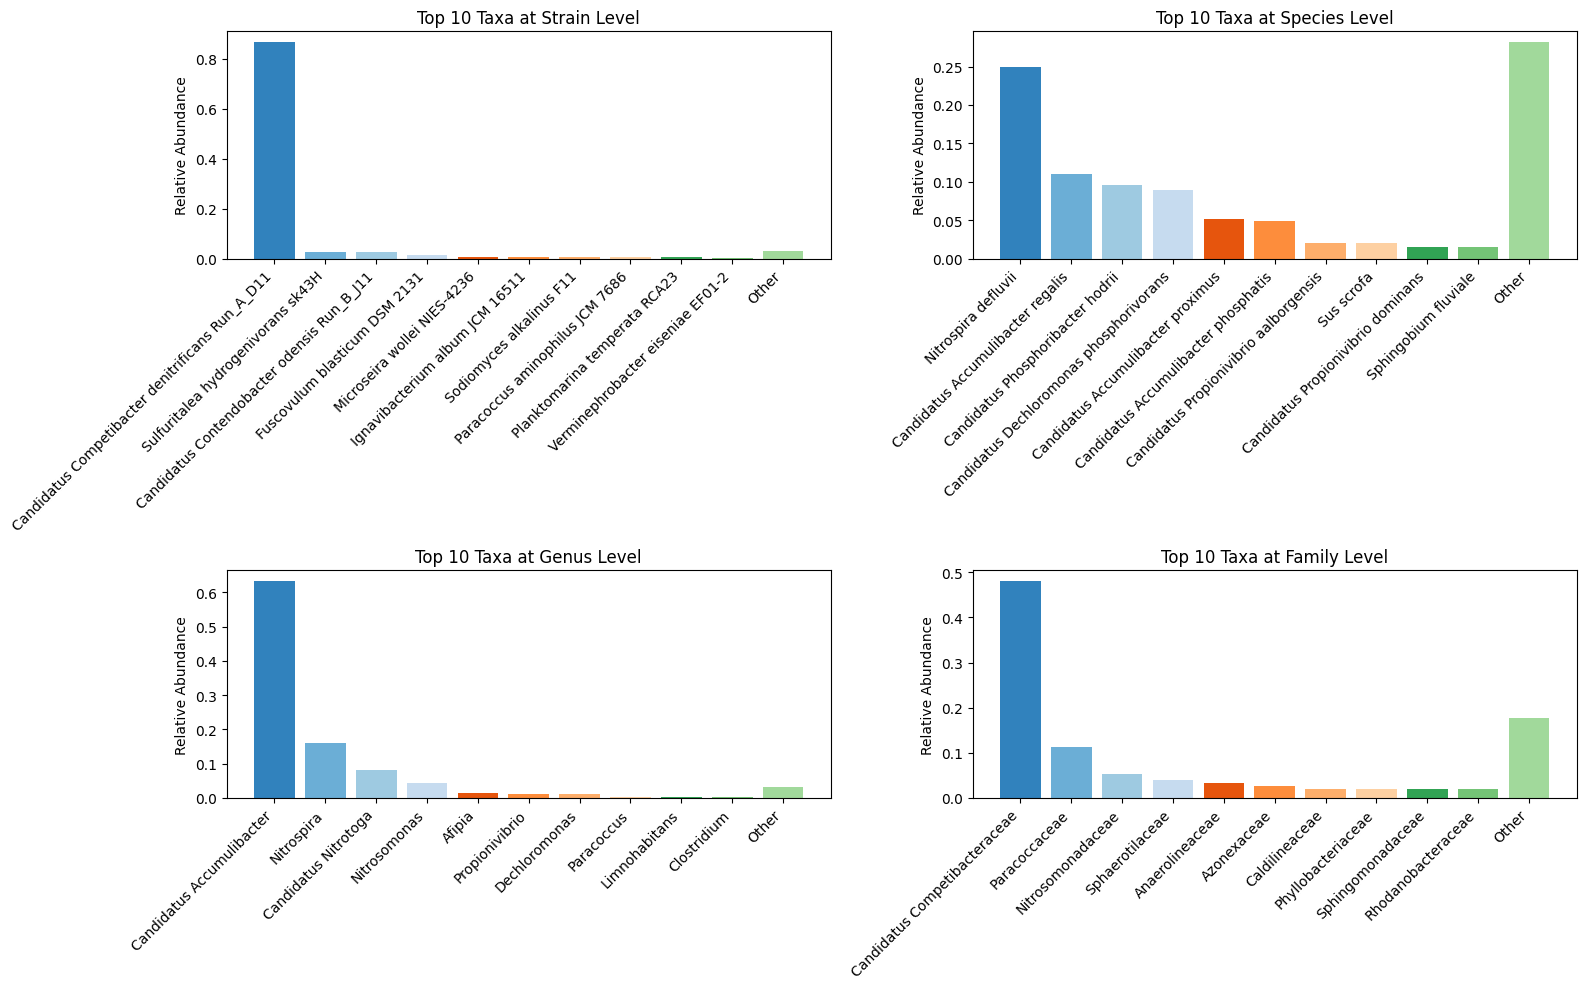

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load CSV ===
df = pd.read_csv("SP_MG_metagenpsm_withlcas.csv")

# === Step 2: Define ranks to plot ===
ranks_to_plot = ["strain", "species", "genus", "family"]

# === Step 3: Prepare figure ===
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# === Step 4: Loop through each rank ===
for i, rank in enumerate(ranks_to_plot):
    ax = axes[i]

    # Filter DataFrame for the current rank
    df_rank = df[df["lca rank"] == rank]

    # Count frequency of LCA names at this rank
    taxon_counts = df_rank["lca name"].value_counts()

    # Select top 10 taxa
    top_10 = taxon_counts.head(10)
    other = taxon_counts.iloc[10:].sum()

    # Combine top 10 with "Other"
    full_counts = pd.concat([top_10, pd.Series({"Other": other})])

    # Normalize to relative abundance
    relative_abundance = full_counts / full_counts.sum()

    # Plot bar chart
    colors = plt.cm.tab20c.colors
    ax.bar(relative_abundance.index, relative_abundance.values, color=colors[:len(relative_abundance)])
    ax.set_title(f"Top 10 Taxa at {rank.capitalize()} Level")
    ax.set_ylabel("Relative Abundance")
    ax.set_xticklabels(relative_abundance.index, rotation=45, ha="right")

# === Step 5: Final layout and show ===
plt.tight_layout()
plt.show()
